# 🔥 Algerian Forest Fires Dataset - Exploratory Data Analysis
## 📊 Comprehensive Data Analysis and Visualization

This notebook provides an in-depth analysis of the Algerian Forest Fires dataset, including data cleaning, feature engineering, and comprehensive visualizations.

### 🎯 Objectives:
- Data cleaning and preprocessing
- Feature analysis and correlation studies
- Temporal analysis of fire occurrences
- Regional comparison of fire patterns
- Weather condition analysis
- FWI components analysis

## 📋 Dataset Information

The dataset includes 244 instances that regroup data from two regions of Algeria:
1. Bejaia region (northeast of Algeria)
2. Sidi Bel-abbes region (northwest of Algeria)

- 122 instances for each region
- Period: June 2012 to September 2012
- 11 attributes and 1 output attribute (class)
- Classification: fire (138 classes) and not fire (106 classes)

## 📝 Attribute Information

1. **Date Components**:
   - Date: DD/MM/YYYY
   - Month: June to September
   - Year: 2012

2. **Weather Data**:
   - Temperature: noon temperature max (°C): 22 to 42
   - RH: Relative Humidity (%): 21 to 90
   - Ws: Wind speed (km/h): 6 to 29
   - Rain: total day (mm): 0 to 16.8

3. **FWI Components**:
   - FFMC: Fine Fuel Moisture Code: 28.6 to 92.5
   - DMC: Duff Moisture Code: 1.1 to 65.9
   - DC: Drought Code: 7 to 220.4
   - ISI: Initial Spread Index: 0 to 18.5
   - BUI: Buildup Index: 1.1 to 68
   - FWI: Fire Weather Index: 0 to 31.1

4. **Target Variable**:
   - Classes: Fire and not Fire

## 📚 Import Required Libraries

In [21]:
# Essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Set style for better visualizations
plt.style.use('seaborn-v0_8')  # Using a specific seaborn style version
sns.set_theme(style="whitegrid")  # Set seaborn theme
plt.rcParams['figure.figsize'] = [12, 8]  # Set default figure size
plt.rcParams['font.size'] = 12  # Set default font size

## 📥 Loading the Dataset

In [22]:
# Load the dataset
dataset = pd.read_csv(r'D:\projects\forest-fire-jul\data\Algerian_forest_fires_dataset_UPDATE.csv', header=1)

# Display basic information
print("Dataset Shape:", dataset.shape)
dataset.head()

Dataset Shape: (246, 14)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## ℹ️ Dataset Information

In [23]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## 🧹 Data Cleaning and Preprocessing

In [24]:
# Check for missing values
print("Missing Values:")
print(dataset.isnull().sum())

# Display rows with missing values
print("\nRows with missing values:")
dataset[dataset.isnull().any(axis=1)]

Missing Values:
day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

Rows with missing values:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## 🌍 Region Information

The dataset is split into two regions:
1. Bejaia Region Dataset (first 122 rows)
2. Sidi-Bel Abbes Region Dataset (remaining rows)

Let's add a Region column to distinguish between them.

In [25]:
# Add Region column
dataset.loc[:122, "Region"] = 0  # Bejaia Region
dataset.loc[122:, "Region"] = 1  # Sidi-Bel Abbes Region
df = dataset

# Display updated information
print("Updated Dataset Info:")
df.info()

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


## 🔄 Data Type Conversion

In [26]:
# Convert Region to integer
df[['Region']] = df[['Region']].astype(int)

# Display first few rows
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


## 🚫 Missing Values Analysis

In [27]:
# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())

Missing Values Count:
day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64


## 🧹 Removing Null Values

In [28]:
# Remove null values and reset index
df = df.dropna().reset_index(drop=True)

# Display first few rows after cleaning
df.head()

# Verify no missing values remain
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


## 🗑️ Removing Duplicate Row

The 122nd row appears to be a duplicate entry. Let's remove it.

In [29]:
# Display the 122nd row
print("122nd Row:")
print(df.iloc[[122]])

# Remove the 122nd row
df = df.drop(122).reset_index(drop=True)

# Verify the removal
print("\nNew 122nd Row:")
print(df.iloc[[122]])

122nd Row:
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
122  FWI  Classes         1  

New 122nd Row:
    day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
122  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   

       Classes    Region  
122  not fire          1  


## 📝 Column Names Cleaning

Let's clean up the column names by removing extra spaces.

In [30]:
# Clean column names
df.columns = df.columns.str.strip()
print("Cleaned Column Names:")
print(df.columns)

# Display updated information
print("\nUpdated Dataset Info:")
df.info()

Cleaned Column Names:
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    i

## 🔄 Data Type Conversion

Convert the required columns to appropriate data types.

In [31]:
# Convert columns to integer
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

# Convert FWI components to float
fwi_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
df[fwi_columns] = df[fwi_columns].astype(float)

# Display updated information
print("Updated Dataset Info:")
df.info()

Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(6), int32(7), object(2)
memory usage: 22.0+ KB


## 📊 Basic Statistics

In [32]:
# Display basic statistics
print("Numerical Features Statistics:")
print(df.describe())

# Class distribution
print("\nClass Distribution:")
print(df['Classes'].value_counts())

# Regional distribution
print("\nRegional Distribution:")
print(df['Region'].value_counts())

Numerical Features Statistics:
              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             FFMC         DMC          DC         ISI         BUI         FWI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    77.842387   14.680658   49.430864    4.742387   16.690535    7.035391   
std     14.349641   12.

In [33]:
# Display basic statistics
print("Numerical Features Statistics:")
print(df.describe())

# Class distribution
print("\nClass Distribution:")
print(df['Classes'].value_counts())

# Regional distribution
print("\nRegional Distribution:")
print(df['Region'].value_counts())

Numerical Features Statistics:
              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             FFMC         DMC          DC         ISI         BUI         FWI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean    77.842387   14.680658   49.430864    4.742387   16.690535    7.035391   
std     14.349641   12.

## 📈 Enhanced Visualizations

### 🔥 Fire vs Not Fire Distribution

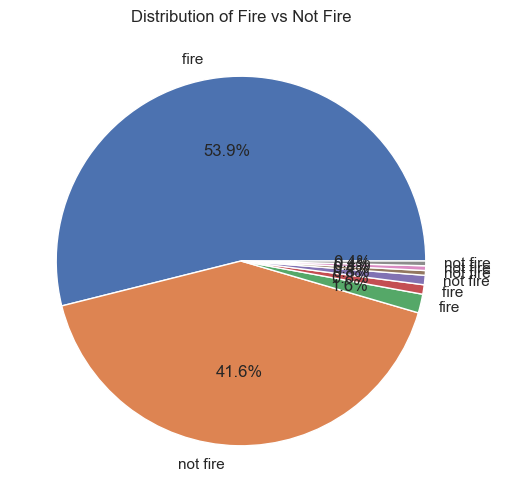

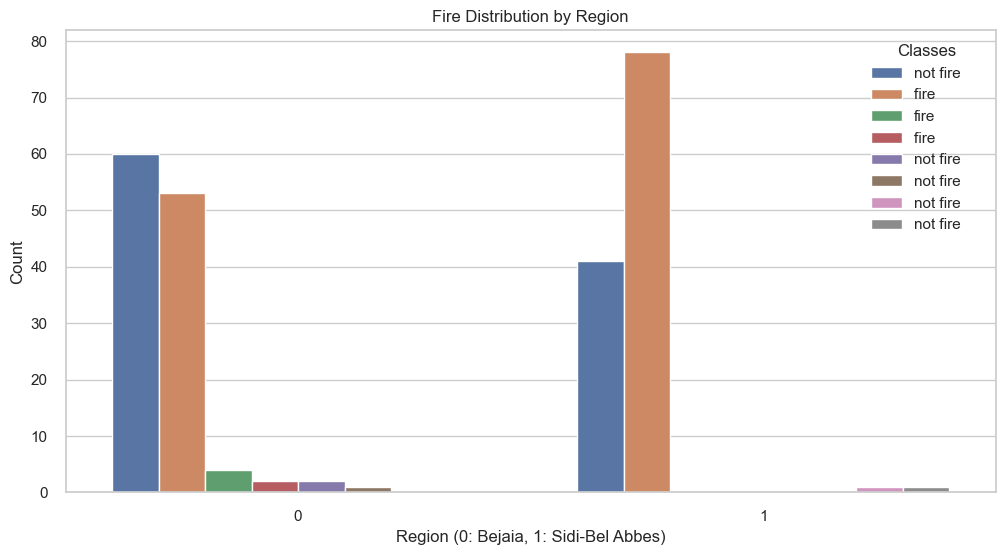

In [34]:
# Create a pie chart for class distribution
plt.figure(figsize=(10, 6))
df['Classes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Fire vs Not Fire')
plt.ylabel('')
plt.show()

# Create a bar plot with region-wise distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region', hue='Classes')
plt.title('Fire Distribution by Region')
plt.xlabel('Region (0: Bejaia, 1: Sidi-Bel Abbes)')
plt.ylabel('Count')
plt.show()

### 🌡️ Weather Conditions Analysis

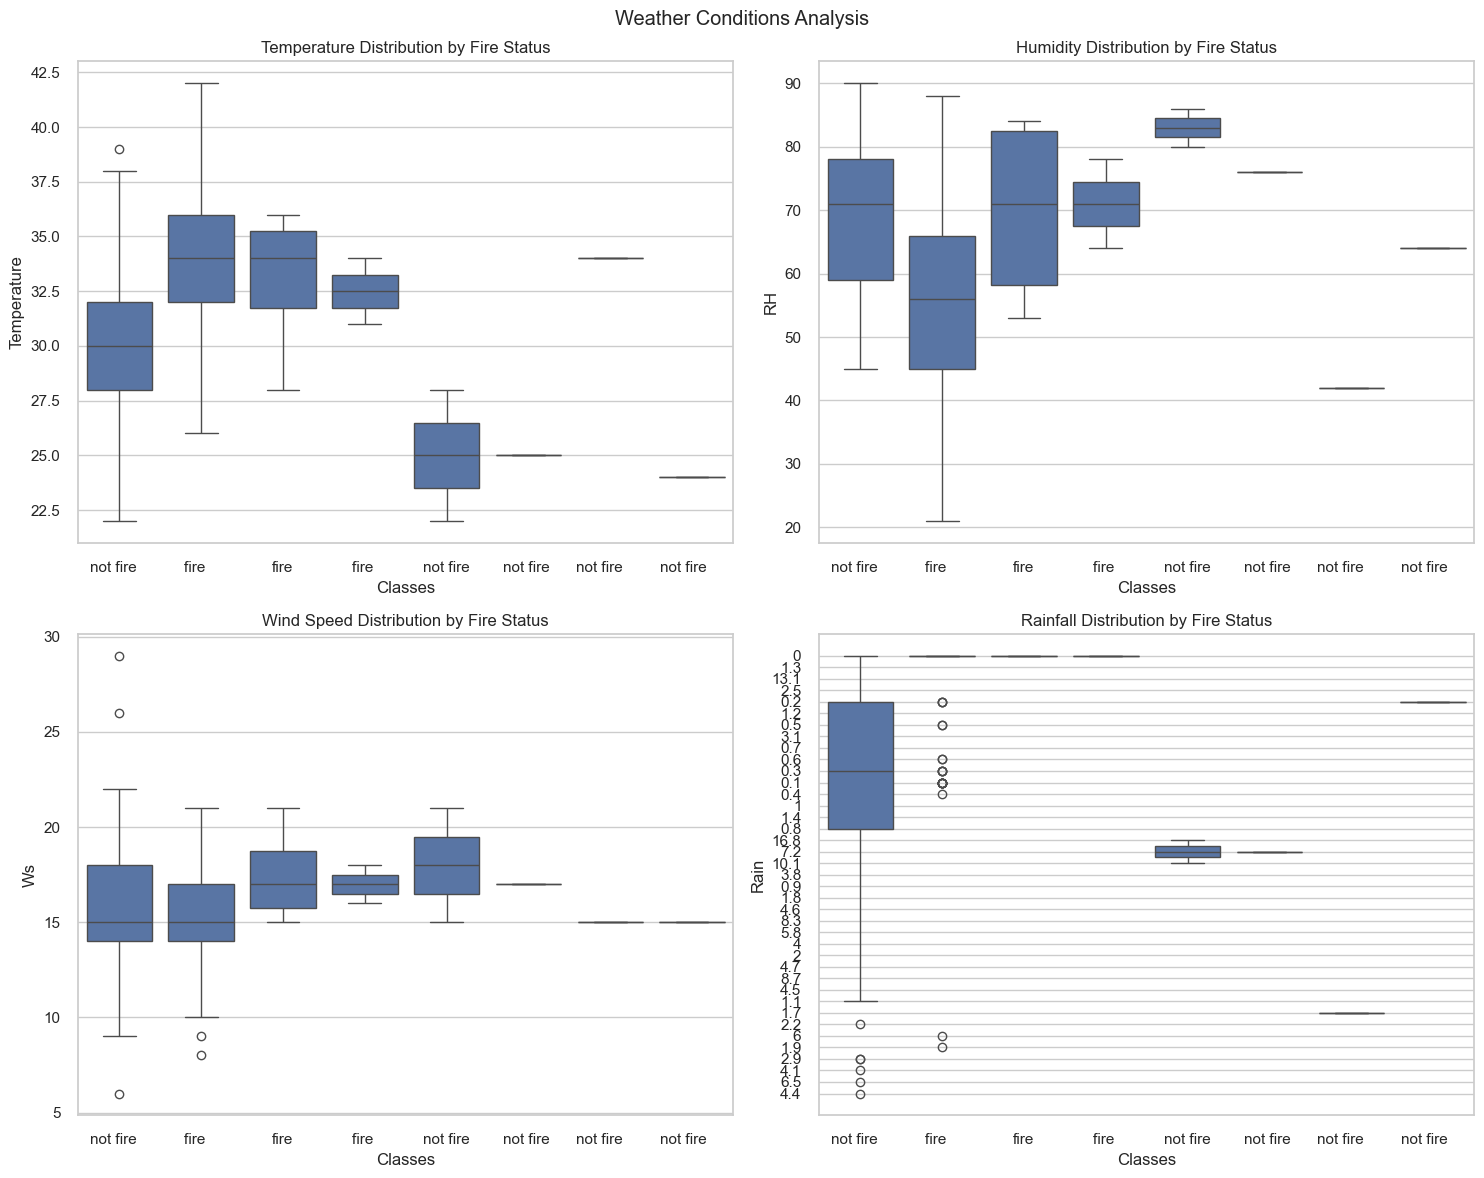

In [35]:
# Create subplots for weather conditions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Weather Conditions Analysis')

# Temperature distribution
sns.boxplot(data=df, x='Classes', y='Temperature', ax=axes[0,0])
axes[0,0].set_title('Temperature Distribution by Fire Status')

# Humidity distribution
sns.boxplot(data=df, x='Classes', y='RH', ax=axes[0,1])
axes[0,1].set_title('Humidity Distribution by Fire Status')

# Wind speed distribution
sns.boxplot(data=df, x='Classes', y='Ws', ax=axes[1,0])
axes[1,0].set_title('Wind Speed Distribution by Fire Status')

# Rainfall distribution
sns.boxplot(data=df, x='Classes', y='Rain', ax=axes[1,1])
axes[1,1].set_title('Rainfall Distribution by Fire Status')

plt.tight_layout()
plt.show()

### 🔥 FWI Components Analysis

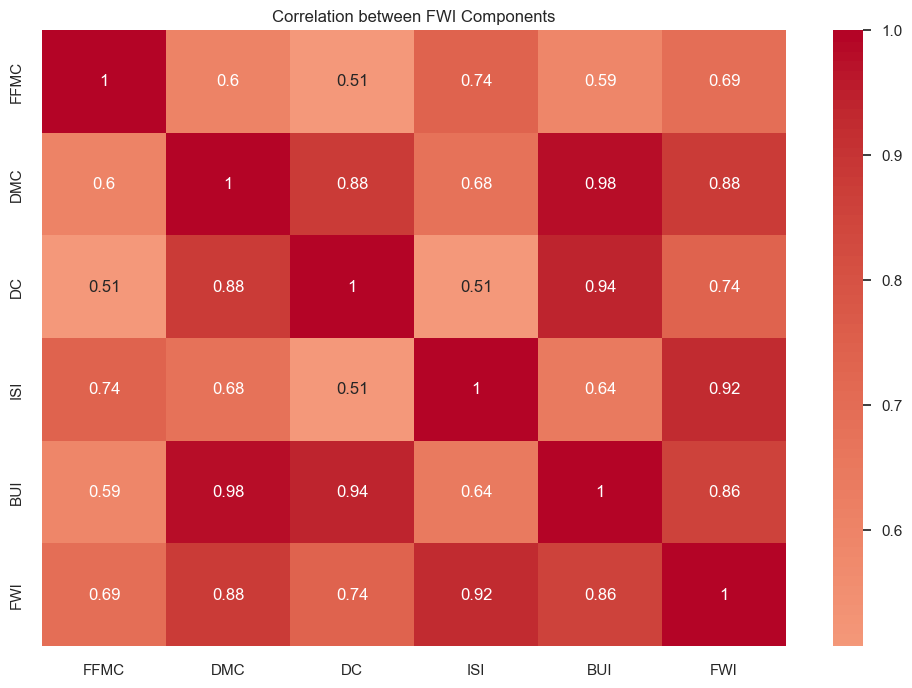

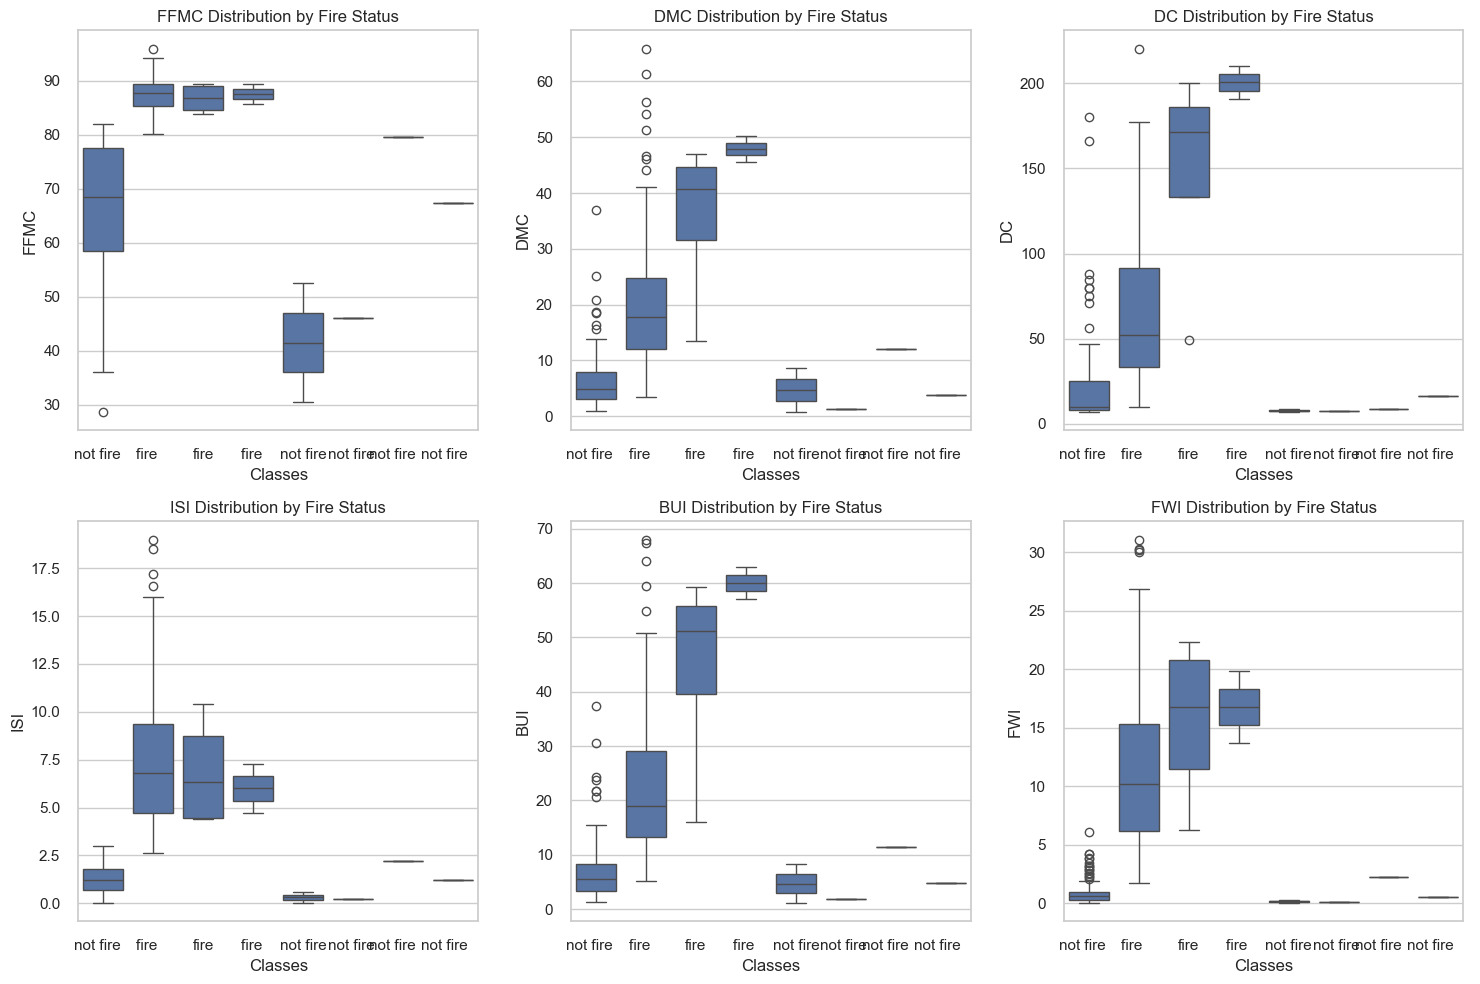

In [36]:
# Create a correlation heatmap for FWI components
plt.figure(figsize=(12, 8))
fwi_corr = df[fwi_columns].corr()
sns.heatmap(fwi_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between FWI Components')
plt.show()

# Create box plots for FWI components
plt.figure(figsize=(15, 10))
for i, col in enumerate(fwi_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Classes', y=col)
    plt.title(f'{col} Distribution by Fire Status')
plt.tight_layout()
plt.show()

### 📅 Temporal Analysis

<Figure size 1200x600 with 0 Axes>

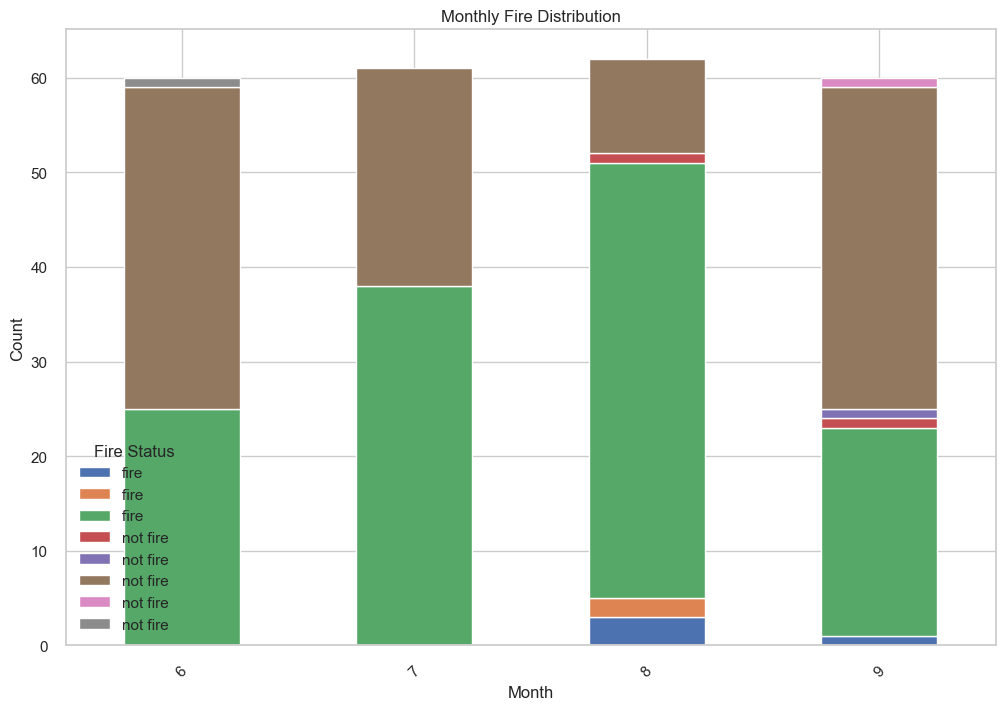

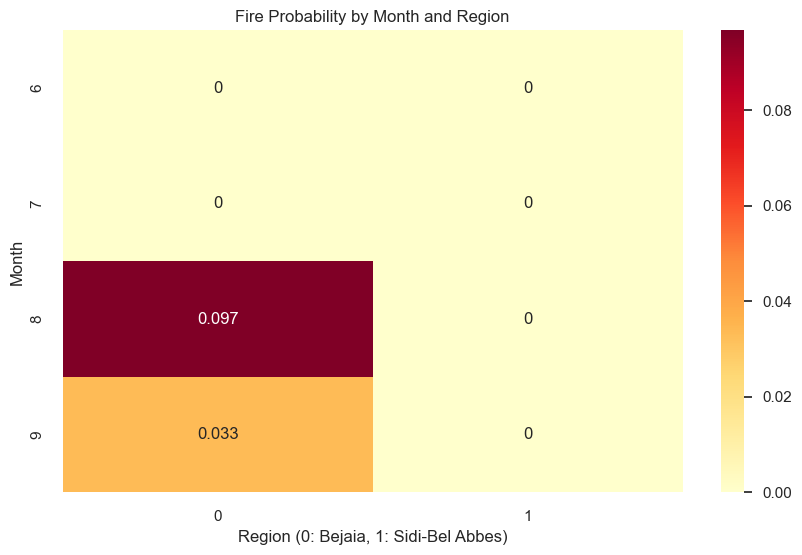

In [37]:
# Create a month-wise fire distribution
plt.figure(figsize=(12, 6))
monthly_fires = df.groupby(['month', 'Classes']).size().unstack()
monthly_fires.plot(kind='bar', stacked=True)
plt.title('Monthly Fire Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fire Status')
plt.show()

# Create a heatmap of fire occurrences by month and region
fire_heatmap = pd.crosstab(df['month'], df['Region'], values=df['Classes'] == 'fire', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(fire_heatmap, annot=True, cmap='YlOrRd')
plt.title('Fire Probability by Month and Region')
plt.xlabel('Region (0: Bejaia, 1: Sidi-Bel Abbes)')
plt.ylabel('Month')
plt.show()

### 🔄 Feature Relationships

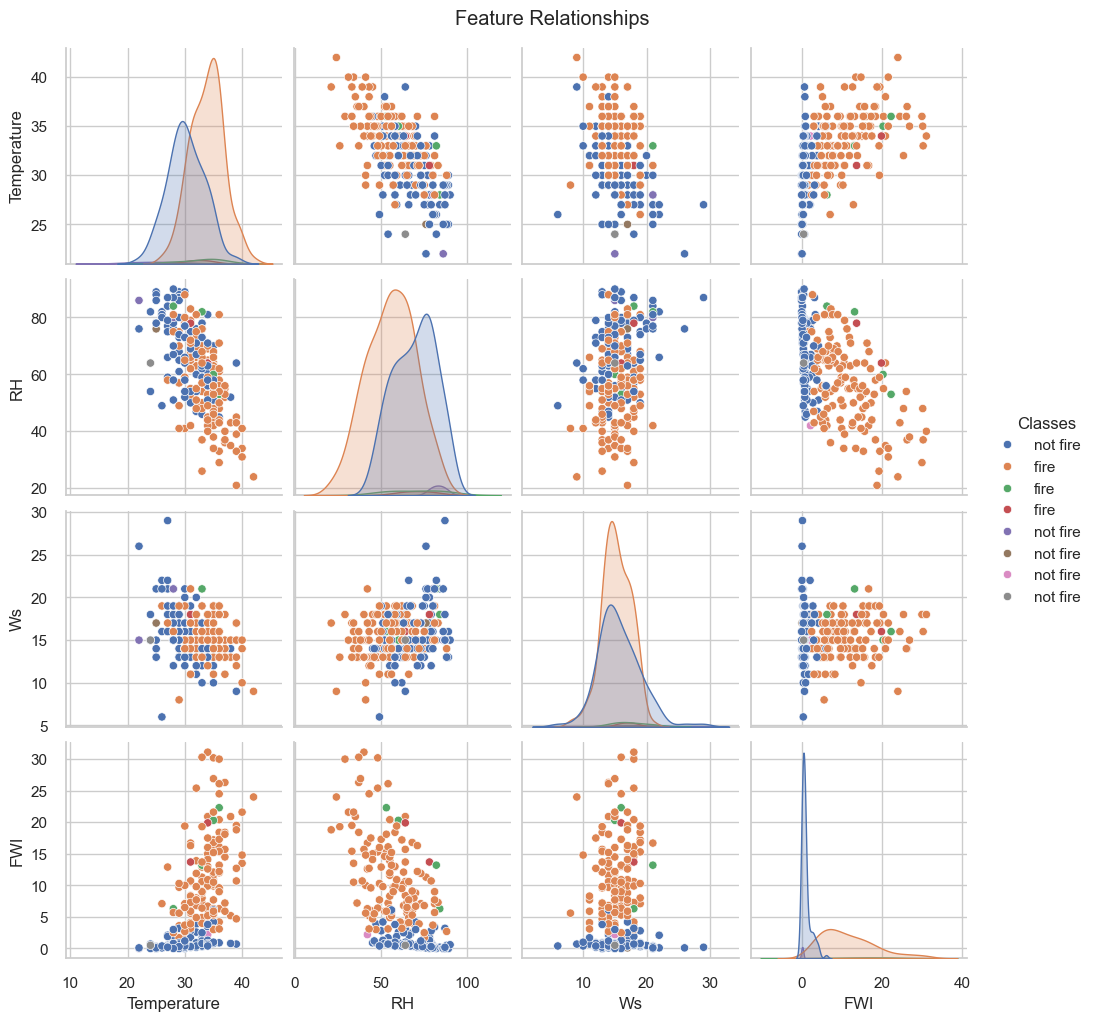

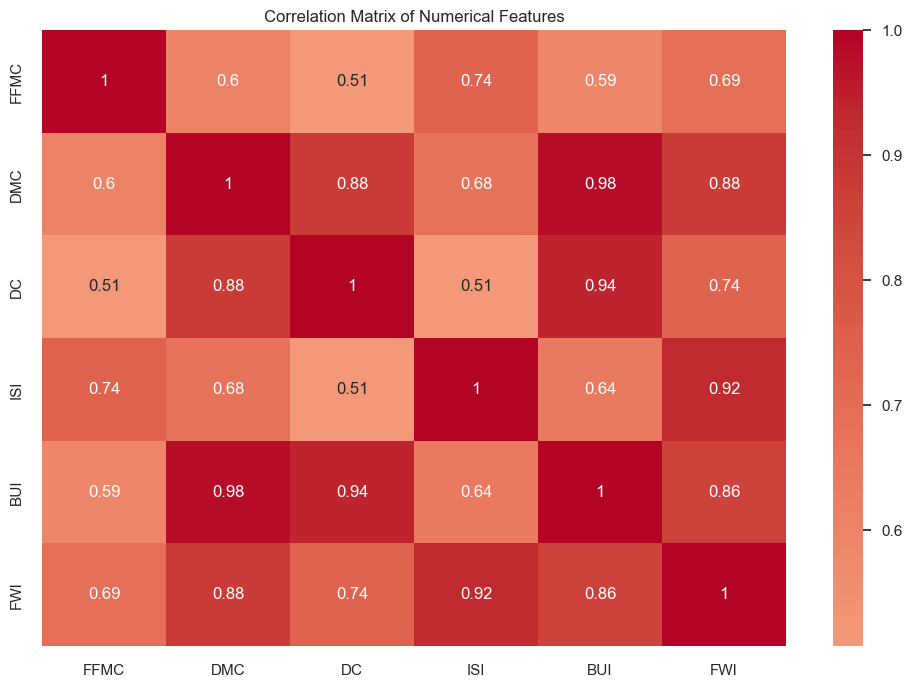

In [38]:
# Create a pairplot for key features
key_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FWI']
sns.pairplot(df[key_features + ['Classes']], hue='Classes', diag_kind='kde')
plt.suptitle('Feature Relationships', y=1.02)
plt.show()

# Create a correlation matrix for all numerical features
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()